In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

In [135]:
class LogisticRegression(object):
    def __init__(self, eps = 0.1, h = 0.1, iter_times = 10):
        self.eps = eps
        self.kernel_window = h
        self.iter_times = iter_times
        
    def _gaussian_kernel(self, x1, x2):
        return np.exp(- ((x1 - x2)**2) / (2 * (self.kernel_window ** 2)))
    
    def _sigmoid(self, x):
        return 1. / (1. + np.exp(-x))
    
    def _softmax(self, vals):
        return np.exp(vals) / np.sum(np.exp(vals), axis = 0)
    
    def _initialize_weight(self, size):
        self.weight = np.random.uniform(high = 1., low = -1., size = size)
        return self.weight
    
    def fit(self, X, y):
        self.train_X = X
        self.train_y = y
        self.class_num = len(np.unique(y))
        self.sample_num = X.size
        self.weight = self._initialize_weight(size = (self.class_num, self.sample_num))
        for epoch in range(self.iter_times):
            self.train_X, self.train_y = shuffle(self.train_X, self.train_y)
            for X_, y_ in zip(self.train_X, self.train_y):
                kernel = self._gaussian_kernel(self.train_X, X_)
                pred_p_y = self.predict(X_)
                self.weight -= self.eps * pred_p_y * kernel[np.newaxis, :]
                self.weight[y_ - 1, :] += self.eps * kernel
        return self
            
    def predict(self, X):
        test_size = X.size
        kernel_sum = np.zeros((self.class_num, test_size))
        for i in range(self.sample_num):
            #print(self.weight[:, i])
            #print(self._gaussian_kernel(X, self.train_X[i]))
            kernel_sum += self.weight[:, i][:, np.newaxis] * self._gaussian_kernel(X, self.train_X[i])
        predict_val = self._softmax(kernel_sum)
        #print(predict_val)
        return predict_val

In [178]:
lr = LogisticRegression(h = 0.2, iter_times = 200)

N = 300
c = 3
y = np.array([[i + 1] *(N/c) for i in range(c)]).reshape((N,))
X = np.linspace(-5, 5, N) + 0.2 * np.random.randn(N)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)
lr.fit(train_X, train_y)

In [185]:
pred = pd.DataFrame(lr.predict(test_X).transpose(), columns = ["1", "2", "3"])
pred["X"] = test_X
pred["y"] = test_y
pred = pred.sort_values(by = "X")

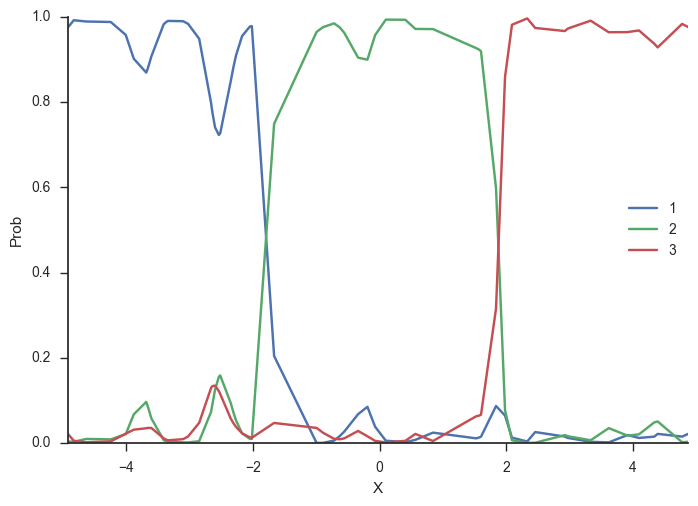

In [186]:
sns.set_style("ticks")
pred.set_index("X").iloc[:, :3].plot()
sns.despine()
plt.ylabel("Prob")